<a href="https://colab.research.google.com/github/Muftawo/RFB-assessment/blob/main/RainForestBuilder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Company Name:** [Rainforest Builder](https://www.rainforestbuilder.com/)  <br>
> **Project:** Rainforest Biomass Predictor Assessment <br>
> **Applicant:** Muftawo Omar<br>
> **Email:** muftawoomar@gmail.com <br>
> **Github:**  [muftawo](https://github.com/Muftawo) <br>




## Table of Contents

1. [Overview](#overview)
2. [Project Goal](#project-goal)
3. [Dataset](#dataset)
4. [Methodology](#methodology)  
   4.1. [Exploratory Data Analysis](#exploratory-data-analysis)  
   4.2. [Data Preparation](#data-preparation)  
   4.3. [Model Fitting](#model-fitting)  
      * [Algorithm Evaluation](#algorithm-evaluation)  
      * [Parameter Tuning](#parameter-tuning)  
      * [Final Model](#final-model)

   4.4. [Model Evaluation](#model-evaluation)  
      - [Model Understanding](#model-understanding)  
   
   4.5. [Biomass Prediction](#biomass-prediction)
5. [Conclusion](#conclusion)  
   5.1. [Summary of Findings](#summary-of-findings)  
   5.2. [Implications for Restoration Activities](#implications-for-restoration-activities)  
   5.3. [Challenges and Limitations](#challenges-and-limitations)  
   5.4. [Future Work](#future-work)  
   5.5. [Practical Implementation](#practical-implementation)


# Overview

Rainforest Builder's primary restoration focus is on the Upper Wassaw (UW) forest reserve, a closed-canopy tropical lowland forest. Typically, such forests reach an average height of over 50 meters and store approximately 700-800 Mg CO2 per hectare. However, the UW reserve faces significant threats from illegal logging, agricultural conversion, and galamsey (illegal mining).

## Project Goal

Between August 2023 and August 2024, Rainforest Builder conducted an extensive survey, measuring aboveground biomass at 107 randomly selected sample plots across the reserve. The central question guiding this project is:

  ***Can we create a predictive model of biomass using multispectral imagery?***

This notebook outlines the approach employed to answer this question.

## Breif About Dataset
The dataset for this project is contained within  `data_budle.zip` which includes:
1.  **Biomass Data:** ESRI shapefiles (e.g., point_data.shp) containing biomass data from the sample plots.
2. **Multispectral Imagery:** A raster file (Sentinel_2_composite_UW_late2023.tif) from late 2023, covering the area used for field inventories.

3. **Pre-extracted Features:** A CSV file (full_dataset.csv) containing extracted multispectral features as an alternative to feature extraction through code.

## Methodology

The methodology that I will be using for this project is largely dependent on the project goal discussed above. The methodlogy framework below gives us a comprehensive guide on the apparoach that will help in achieving project goal.


1. Exploratory Data Analysis
  * Data Quality Assessment
  * Descriptive Statistics
  * Data Analysis

2. Data Preparation
  * Data Cleaning and Preprocessing
  * Feature Engineering and Selection
  * Splitting Dataset

3. Model Fitting
  * Initial Model Training
  * Algorithm Evaluation
    * Testing various algorithms and comparing performance.
  * Parameter Tuning
    * Optimizing model hyperparameters to improve performance.
  * Final Model
    * Selecting and training the final model based on evaluation.

4. Model Evalution:
  * Assessing the final model’s performance using evaluation metrics.
   * Model Understanding
    * Interpreting model predictions and understanding the key features driving biomass predictions.

5. Biomass Prediction
 * Applying the final model across the full raster extent to generate biomass estimates.


## Conclusion
  * Summary of Findings
  * Implications for Restoration Activities
  * Challenges and Limitations
  * Future Work
  * Practical Implementation





# Exploratory Data Analysis

In this section, we will explore our dataset to gain insights and enhance our overall understanding of the data. This will include the following steps:

1. Data Quality Analysis
2. Descriptive Statistics
3. Data Analysis


We will start by unzipping the dataset into the project directory, followed by an exploration of the available files using Python.

In [ ]:
## Unzip data_bundle :TODO please change the paths to accordingly
!unzip /content/drive/MyDrive/2024/data_bundle.zip -d '/content/drive/MyDrive/2024/'

In [ ]:
# install required packages
!pip install geopandas rasterio shapely scikit-learn numpy pandas matplotlib rioxarray pydeck

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.6 MB/s eta 0:00:00


In [ ]:
# module imports
import pandas as pd
import numpy as np

import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point

from pyproj import Transformer

import pydeck as pdk
import matplotlib.colors as mcolors


In [ ]:

base_path = '/content/drive/MyDrive/2024/data_bundle/'

# 1. Loading the Biomass Data (Shapefile)
shapefile_path = f"{base_path}/point_data.shp"
biomass_data = gpd.read_file(shapefile_path)


# # 2. Loading the Multispectral Imagery (Sentinel-2)
# raster_path = f"{base_path}/Sentinel_2_composite_UW_late2023.tif"
# with rasterio.open(raster_path) as src:
#     print("Multispectral Imagery Info:")
#     print(src.profile)

#     # Show a preview of the first band of the multispectral image
#     rasterio.plot.show(src.read(1), title="Sentinel-2 Band 1")



In [ ]:
# Inspect the first few rows of the biomass data
print("Biomass Data (First 5 Rows):")
print(biomass_data.head())


Biomass Data (First 5 Rows):
    biomass                                           geometry
0  0.304348  POLYGON ((590105.692 678320.723, 590105.692 67...
1  0.086957  POLYGON ((588919.456 679079.536, 588919.456 67...
2  0.086957  POLYGON ((588736.222 678933.11, 588736.222 678...
3  0.043478  POLYGON ((588248.183 679048.24, 588248.183 679...
4  0.130435  POLYGON ((588618.928 679005.575, 588618.928 67...


In [ ]:
# Confrim Coordinate Reference System (CRS)
print("CRS of Biomass Data:", biomass_data.crs)

CRS of Biomass Data: EPSG:32630


In [ ]:
#Confirm we have data from 107 sample plots
print("Total count of Sample Plots in dataset:", biomass_data.shape[0])

Total count of Sample Plots in dataset: 110
(110, 2)


In [ ]:
# Perform basic data quality checks
print("Missing Values in Biomass Data:")
print(biomass_data.isnull().sum())

Missing Values in Biomass Data:


biomass     3
geometry    0
dtype: int64

While we have coordinates for a total of 110 sample plots, we are missing the corresponding biomass data for 3 of these plots. This confirms that we have data for the expected 107 plots.

I will visualize and examine the locations of these missing data plots relative to the others to inform my decision on how to handle them.



In [ ]:
biomass_data.head()

biomass                                           geometry  \
0  0.304348  POLYGON ((590105.692 678320.723, 590105.692 67...   
1  0.086957  POLYGON ((588919.456 679079.536, 588919.456 67...   
2  0.086957  POLYGON ((588736.222 678933.11, 588736.222 678...   
3  0.043478  POLYGON ((588248.183 679048.24, 588248.183 679...   
4  0.130435  POLYGON ((588618.928 679005.575, 588618.928 67...   

                       centriods       latitude      longitude  
0  POINT (590125.692 678340.723)  678340.723056  590125.691838  
1  POINT (588939.456 679099.536)  679099.536421  588939.455531  
2   POINT (588756.222 678953.11)  678953.110413  588756.221774  
3   POINT (588268.183 679068.24)  679068.240438  588268.182977  
4  POINT (588638.928 679025.575)  679025.574940  588638.927613

<ipython-input-161-0c0dc39c717e>:15: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


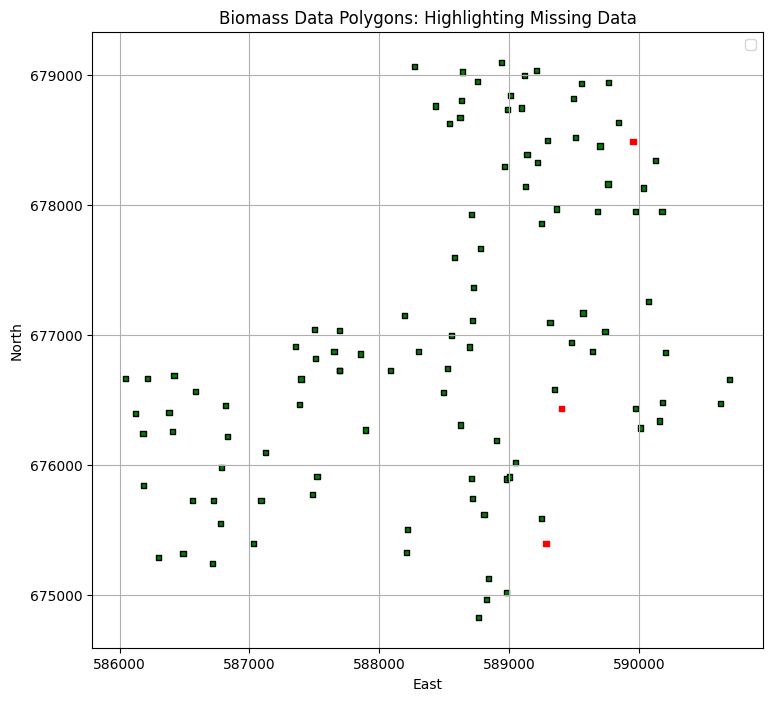

In [ ]:

# Let's create a new column to indicate if biomass data is missing
biomass_data['missing_biomass'] = biomass_data['biomass'].isnull()


fig, ax = plt.subplots(figsize=(12, 8))

# Plot all polygons with color codes, 'red' for missing biomass data, 'green' for available data
biomass_data[biomass_data['missing_biomass']].plot(ax=ax, color='red', label='Missing Biomass', edgecolor='red')
biomass_data[~biomass_data['missing_biomass']].plot(ax=ax, color='green', label='Available Biomass', edgecolor='black')


plt.title('Biomass Data Polygons: Highlighting Missing Data')
plt.xlabel('East')
plt.ylabel('North')
plt.legend()
plt.grid()
plt.show()

# drop new column
biomass_data = biomass_data.drop('missing_biomass', axis=1)


Given that we have 3 missing values out of 110, which represents approximately 2.7%, and that these missing plots are not concentrated in any specific area, I will proceed to drop them to simplify the dataset.

If the number of missing values had been higher, I would consider employing interpolation techniques to estimate the expected biomass for these plots.

In [ ]:
biomass_data.dropna(inplace=True)

In [ ]:
biomass_data.shape

(107, 2)

In [ ]:
print("Summary Statistics of Biomass Data:")
print(biomass_data.describe())

Summary Statistics of Biomass Data:
          biomass
count  107.000000
mean     0.238115
std      0.231406
min      0.000000
25%      0.043478
50%      0.130435
75%      0.369565
max      1.000000


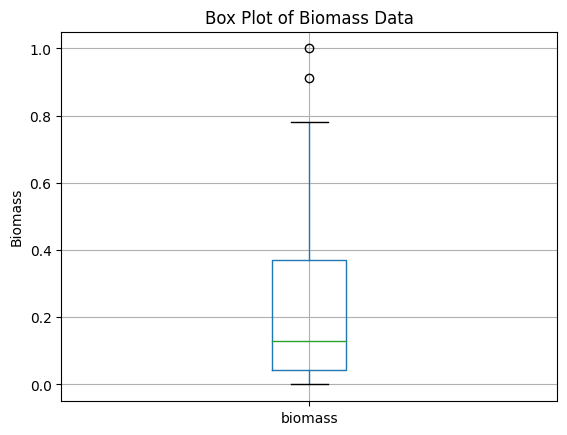

In [ ]:
# plot box
biomass_data.boxplot(column='biomass')
plt.title('Box Plot of Biomass Data')
plt.ylabel('Biomass')
plt.show()


In [ ]:

print("Investigating nth percentiles of biomass:")
biomass_data['biomass'].quantile([0.75, 0.90, 0.95, ])

Biomass Data Summary:


0.75    0.369565
0.90    0.608696
0.95    0.682609
Name: biomass, dtype: float64

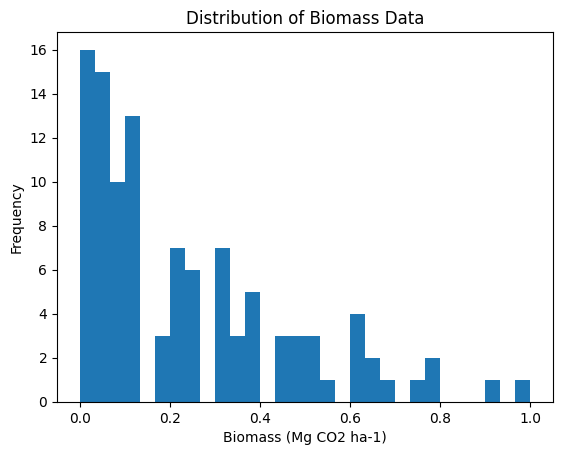

In [ ]:
# plot histogram
biomass_data['biomass'].plot(kind='hist', bins=30, title='Distribution of Biomass Data')
plt.xlabel('Biomass ')
plt.ylabel('Frequency')
plt.show()

In [ ]:


transformer = Transformer.from_crs('epsg:32630', 'epsg:4326')


# Helper Function to convert the geometry centroids from projected to lat/lon for visualization purpose
def convert_to_latlon(geometry):
    x, y = geometry.x, geometry.y
    lon, lat = transformer.transform(x, y)
    return lat, lon

biomass_data['centriods'] =biomass_data['geometry'].centroid
biomass_data['longitude'], biomass_data['latitude'] = zip(*biomass_data['centriods'].apply(convert_to_latlon))
biomass_data.drop('centriods', axis=1, inplace=True)


biomass_data.head()

biomass                                           geometry  longitude  \
0  0.304348  POLYGON ((590105.692 678320.723, 590105.692 67...  -2.185454   
1  0.086957  POLYGON ((588919.456 679079.536, 588919.456 67...  -2.196164   
2  0.086957  POLYGON ((588736.222 678933.11, 588736.222 678...  -2.197822   
3  0.043478  POLYGON ((588248.183 679048.24, 588248.183 679...  -2.202231   
4  0.130435  POLYGON ((588618.928 679005.575, 588618.928 67...  -2.198881   

   latitude  
0  6.136307  
1  6.143187  
2  6.141865  
3  6.142913  
4  6.142522

In [ ]:


# Apply the custom red-to-green colormap to the biomass data
norm = mcolors.Normalize(vmin=biomass_data['biomass'].min(), vmax=biomass_data['biomass'].max())
cmap = mcolors.LinearSegmentedColormap.from_list("red_green", ["red", "yellow", "green"])

biomass_data['color'] = biomass_data['biomass'].apply(lambda x: [int(c*255) for c in cmap(norm(x))[:3]])

# Scale the heights for visibility
biomass_data['height'] = (biomass_data['biomass'] * 100).round(2)


layer = pdk.Layer(
    "ColumnLayer",
    data=biomass_data,
    get_position=["longitude", "latitude"],
    get_fill_color="color",
    get_radius=50,
    radius=50,
    elevation_scale=30,
    get_elevation='height',
     pickable=True,
    auto_highlight=True,
)

# Set the viewport
view_state = pdk.ViewState(
    latitude=biomass_data['latitude'].mean(),
    longitude=biomass_data['longitude'].mean(),
    zoom=12,
    pitch=45,
    bearing=0,
)


view = pdk.data_utils.compute_view(biomass_data[["longitude", "latitude"]])
view.pitch = 75
view.bearing = 60

tooltip = {
    "html": " Biomass <b>{height} %</b>",
    "style": {"background": "grey", "color": "white", "font-family": '"Helvetica Neue", Arial', "z-index": "10000"},
}

r = pdk.Deck(
    layers=[layer],
    initial_view_state=view_state,
    tooltip=tooltip,

)

r.show()


#remove unnessacry columns
biomass_data.drop('color', axis=1, inplace=True)
biomass_data.drop('height', axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [ ]:

print("Investigating nth percentiles of biomass:")
biomass_data['biomass'].quantile([0.75, 0.90, 0.95, ])

Investigating nth percentiles of biomass:


0.75    0.369565
0.90    0.608696
0.95    0.682609
Name: biomass, dtype: float64

In [ ]:
# De
q1 = biomass_data['biomass'].quantile(0.25)
q3 = biomass_data['biomass'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr
uw = q3 + 1.5 * iqr

# Outliers are below the lower whisker OR above the upper whisker
outliers = (biomass_data['biomass'] < lw) | (biomass_data['biomass'] > uw)

biomass_data[outliers]

biomass                                           geometry  longitude  \
51  1.000000  POLYGON ((590055.766 677238.54, 590055.766 677...  -2.185920   
91  0.913043  POLYGON ((588606.041 676286.757, 588606.041 67...  -2.199034   

    latitude                                      geometry_json  \
51  6.126519  {'type': 'Polygon', 'coordinates': (((-2.18610...   
91  6.117929  {'type': 'Polygon', 'coordinates': (((-2.19921...   

                               geometry_list_of_lists  
51  [[[-2.186101013794541, 6.126337973400951], [-2...  
91  [[[-2.199215171858667, 6.11774845048785], [-2....

### Biomass Distribution Summary

The distribution of the scaled biomass scores indicates a low biomass concentration across the different plots. With a mean of `23.81%` and a median of `13.04%`, more than `50%` of the `107` plots have a biomass below `13.04%`. Additionally, the 75th percentile of biomass concentration is approximately `36.95%`, indicating that three-quarters of the plots have biomass concentrations below this level.

At the higher end of the distribution, we observe that at the 90th percentile, the surveyed biomass is above `60%`, and at the 95th percentile, it reaches `68.26%`. Furthermore, a few outliers show exceptionally high biomass concentrations, including instances of `100%` biomass in some plots.

Further visualizations of the forest reserve, focusing on biomass distribution, reveal a concentration of plots with low levels of biomass that appear to be skewed toward specific parts of the forest reserve.

Further investigations regarding the outliers indicate that there are two plots with high biomass percentages of `91%` and `100%`. The visualization also shows that the plot with `91%` biomass is located in an area of the reserve with relatively high levels of biomass, while the `100%` plot is not. Therefore, I will exclude only the `100%` biomass plot from the dataset to streamline the analysis moving forward.




In [ ]:
biomass_data = biomass_data[biomass_data['biomass'] != 1]

In [ ]:
biomass_data.shape

(106, 6)

## Exploring Sentinel-2 raster

After exploring the biomass data I processed with further analysis of the serinel-2 image.

<ipython-input-361-6268c1bc84d7>:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  biomass_data['centroid'] = biomass_data.centroid


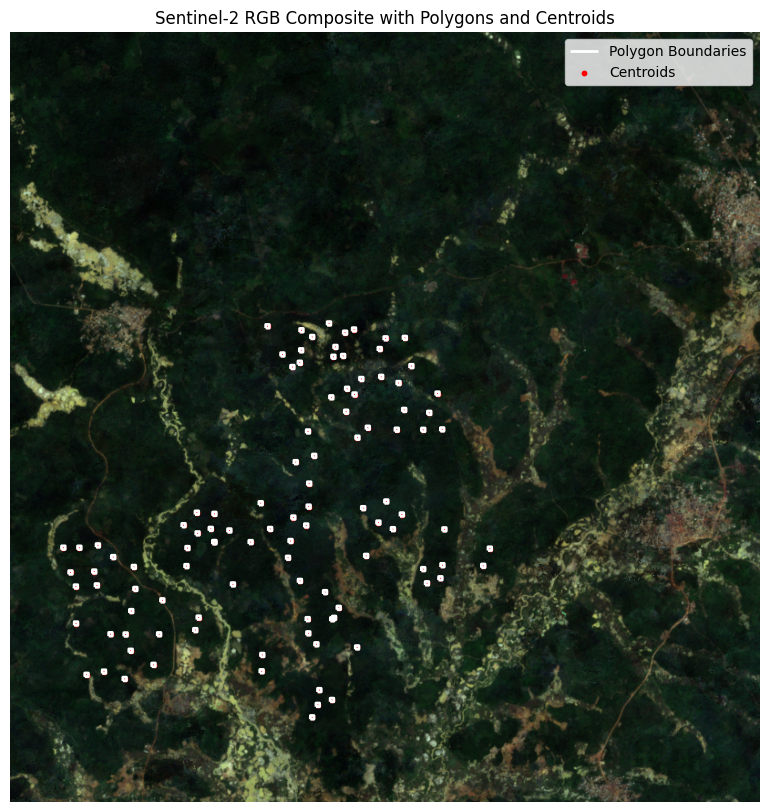

In [361]:
## helper functions


def normalize(band):
    """Normalize the input band to a range between 0 and 1."""
    band_min, band_max = band.min(), band.max()
    return (band - band_min) / (band_max - band_min)

def load_and_prepare_rgb(raster_path):
    """Load Sentinel-2 imagery bands (Red, Green, Blue), normalize them, and return an RGB composite."""
    with rasterio.open(raster_path) as src:
        # Read Red, Green, and Blue bands (Band 4, Band 3, Band 2 respectively)
        red_band = src.read(4)
        green_band = src.read(3)
        blue_band = src.read(2)

    # Normalize the bands
    red_n = normalize(red_band)
    green_n = normalize(green_band)
    blue_n = normalize(blue_band)

    # Stack the normalized bands into an RGB composite image
    rgb_image = np.dstack((red_n, green_n, blue_n))

    return rgb_image, src

def plot_rgb_with_polygons(rgb_image, biomass_data, src):
    """Plot the RGB composite image and overlay polygons with centroids."""
    # Transform the biomass_data CRS to match the raster CRS
    biomass_data = biomass_data.to_crs(src.crs)

    # Extract centroids
    biomass_data['centroid'] = biomass_data.centroid

    # Plot RGB image
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(rgb_image, extent=(src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top))

    # Plot polygon boundaries on the RGB image
    biomass_data.boundary.plot(ax=ax, edgecolor='white', linewidth=2, label='Polygon Boundaries')

    # Plot centroids
    biomass_data['centroid'].plot(ax=ax, color='blue', markersize=10, label='Centroids')

    # Add legend and title
    plt.legend()
    plt.title("Sentinel-2 RGB Composite with Polygons and Centroids")
    plt.axis('off')
    plt.show()

# File path to the Sentinel-2 imagery
raster_path = f"{base_path}/Sentinel_2_composite_UW_late2023.tif"

# Load and prepare the RGB image and raster source
rgb_image, src = load_and_prepare_rgb(raster_path)

# Plot the RGB image with polygon overlays
plot_rgb_with_polygons(rgb_image, biomass_data, src)


Multispectral Imagery Info:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 823, 'height': 841, 'count': 23, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, -2.2276422415595896,
       0.0, -8.983152841195215e-05, 6.17178532801476), 'blockxsize': 823, 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


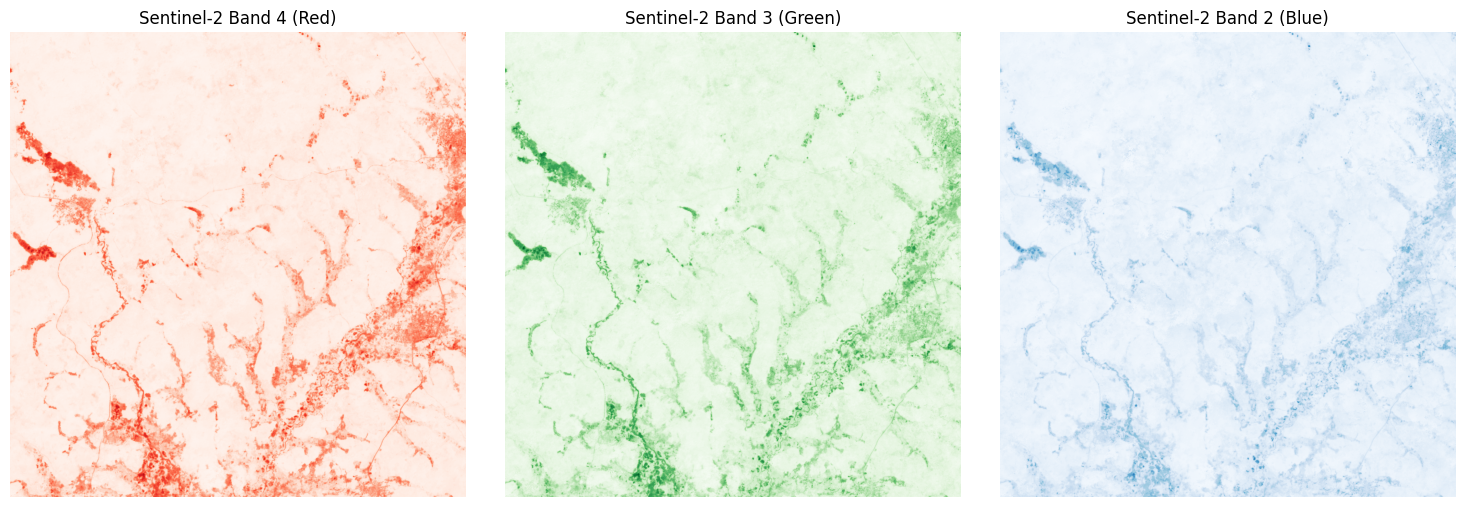

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Load the multispectral imagery (Sentinel-2)
raster_path = f"{base_path}/Sentinel_2_composite_UW_late2023.tif"
with rasterio.open(raster_path) as src:
    print("Multispectral Imagery Info:")
    print(src.profile)

    # Read the specific bands
    red_band = src.read(4)   # Band 4 - Red
    green_band = src.read(3) # Band 3 - Green
    blue_band = src.read(2)  # Band 2 - Blue

# Plot the three bands
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Red Band
axs[0].imshow(red_band, cmap='Reds')
axs[0].set_title('Sentinel-2 Band 4 (Red)')
axs[0].axis('off')

# Plot Green Band
axs[1].imshow(green_band, cmap='Greens')
axs[1].set_title('Sentinel-2 Band 3 (Green)')
axs[1].axis('off')

# Plot Blue Band
axs[2].imshow(blue_band, cmap='Blues')
axs[2].set_title('Sentinel-2 Band 2 (Blue)')
axs[2].axis('off')

plt.tight_layout()
plt.show()


<ipython-input-326-6a85ff578389>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point_data['centroid'] = point_data.centroid


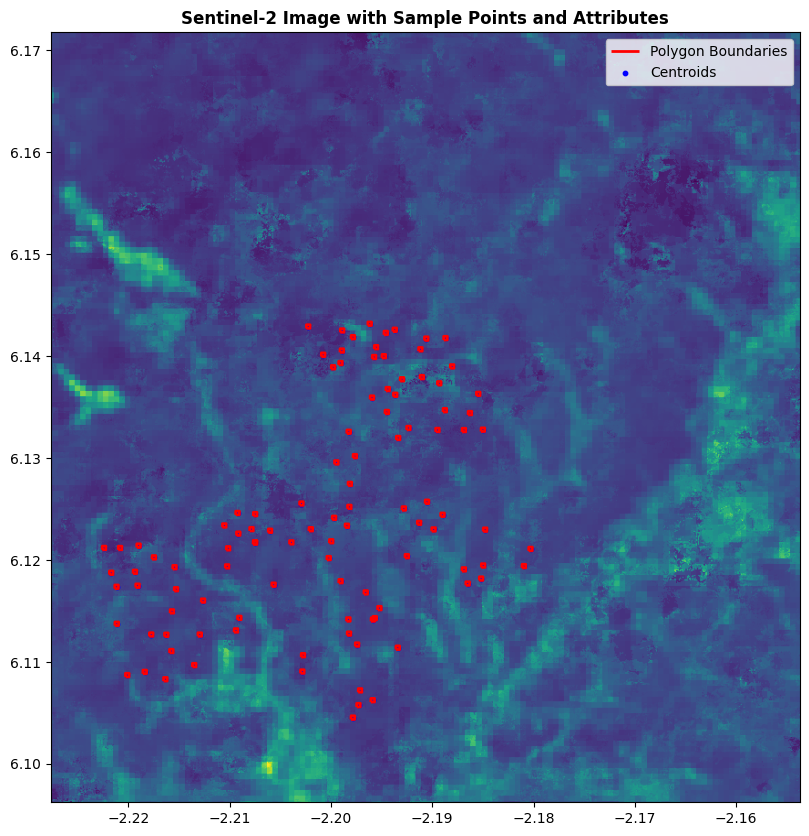

In [ ]:
with rasterio.open(raster_path) as src:
    # Transform CRS of the point data to match the raster's CRS
    point_data = biomass_data.to_crs(src.crs)

    # Extract the centroids of the polygons
    point_data['centroid'] = point_data.centroid

    # Plot the raster image
    fig, ax = plt.subplots(figsize=(10, 10))
    show(src, ax=ax, title="Sentinel-2 Image with Sample Points and Attributes")

    # Plot the polygons over the raster
    point_data.boundary.plot(ax=ax, edgecolor='red', linewidth=2, label='Polygon Boundaries')

    # Plot centroids
    point_data['centroid'].plot(ax=ax, color='blue', markersize=10, label='Centroids')

    # Add legend and show plot
    plt.legend()
    plt.show()

In [1]:

# Open the raster file
with rasterio.open(raster_path) as src:
    # Print metadata to understand the structure of the raster
    print(src.meta)

    print("="*100)

    # Get the number of bands

    print(f"Total Number of bands: {src.count}")

    print("="*100)

    # Get the number of bands

    print(f"Tags: {src.tags}")






NameError: name 'rasterio' is not defined

In [2]:


band_titles = ['Aerosol - Band 1', 'Blue - Band 2', 'Green - Band 3', 'Red - Band 4',
                   'Red Edge - Band 5', 'Band 6', 'Band 7', 'NIR - Band 8', 'Band 9',
                   'Band 10', 'SWIR 1 - Band 11', 'SWIR 2 - Band 12']

# Plotting the bands and NDVI
fig, ax = plt.subplots(4, 3, figsize=(15, 15))

# Display each band
ax[0, 0].imshow(band_aerosol, cmap='gray')
ax[0, 0].set_title(band_titles[0])

ax[0, 1].imshow(band_blue, cmap='Blues')
ax[0, 1].set_title(band_titles[1])

ax[0, 2].imshow(band_green, cmap='Greens')
ax[0, 1].set_title(band_titles[2])

ax[1, 0].imshow(band_red, cmap='Reds')
ax[0, 1].set_title(band_titles[3])

ax[1, 1].imshow(band_red_edge, cmap='RdYlGn')
ax[0, 1].set_title(band_titles[4])

ax[1, 2].imshow(band_06, cmap='gray')
ax[0, 1].set_title(band_titles[5])

ax[2, 0].imshow(band_07, cmap='gray')


ax[2, 1].imshow(band_nir, cmap='gray')
ax[2, 1].set_title('NIR - Band 8')

ax[2, 2].imshow(band_09, cmap='gray')
ax[2, 2].set_title('Band 9')

ax[3, 0].imshow(band_10, cmap='gray')
ax[3, 0].set_title('Band 10')

ax[3, 1].imshow(band_swir_1, cmap='gray')
ax[3, 1].set_title('SWIR 1 - Band 11')

ax[3, 2].imshow(band_swir_2, cmap='gray')
ax[3, 2].set_title('SWIR 2 - Band 12')

# Display NDVI
fig, ax_ndvi = plt.subplots(figsize=(5, 5))
ax_ndvi.imshow(ndvi, cmap='RdYlGn')
ax_ndvi.set_title('NDVI')
ax_ndvi.axis('off')

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

In [378]:


band_titles = ['Aerosol - Band 1', 'Blue - Band 2', 'Green - Band 3', 'Red - Band 4',
                   'Red Edge - Band 5', 'Band 6', 'Band 7', 'NIR - Band 8', 'Band 9',
                   'Band 10', 'SWIR 1 - Band 11', 'SWIR 2 - Band 12']


# While there are 23 different bands in the raster I will limit our feature extraction to only the 12 listed in [here](https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/bands/)
# for the purpose of this exercise
def extract_raster_features_for_plots(raster_path, biomass_data):
    """
    Function to extract multispectral features
    """

    with rasterio.open(raster_path) as src:

        biomass_data = biomass_data.to_crs(src.crs)

        # Initialize a list to store features for each plot
        features_list = []


        for idx, row in biomass_data.iterrows():
            # Extract the geometry (polygon)
            geom = [row['geometry']]
            biomass = row['biomass']


            # Extract the pixel values for the row geometry for all bands
            out_image, out_transform = rasterio.mask.mask(src, geom, crop=True)

            # Reshape to have bands in the first axis and flatten each band's pixels
            out_image = out_image.reshape(src.count, -1)

            # Initialize a dictionary to store statistics for this row
            row_feature_values = {'biomass': biomass}

            # Loop over all bands and calculate statistics
            for band_idx in range(len(band_titles)):
                band_data = out_image[band_idx]

                # Mask out NoData values
                band_data = band_data[band_data != src.nodata]

                if band_data.size > 0:
                    # Calculate statistics: mean, min, max, median
                    row_feature_values[f'B{band_idx+1}'] = np.mean(band_data)

                else:
                    # If there are no valid data points, set NaNs
                    row_feature_values[f'B{band_idx+1}'] = np.nan


            features_list.append(row_feature_values)

    # Convert the list of features into a DataFrame
    features_df = gpd.GeoDataFrame(features_list)

    return features_df


raster_path = f"{base_path}/Sentinel_2_composite_UW_late2023.tif"

multispectral_features_df = extract_raster_features_for_plots(raster_path, biomass_data)


multispectral_features_df.head()



biomass           B1          B2           B3          B4           B5  \
0  0.304348  1015.719971  933.419983  1061.479980  899.919983  1272.020020   
1  0.086957   997.099976  952.320007  1119.959961  960.359985  1331.400024   
2  0.086957   997.340027  937.900024  1056.719971  914.039978  1322.199951   
3  0.043478   915.960022  965.940002  1060.699951  948.520020  1279.099976   
4  0.130435   929.679993  915.659973  1052.079956  923.099976  1288.760010   

            B6           B7           B8           B9          B10  \
0  2666.580078  3183.739990  3180.800049  3425.500000  3221.679932   
1  2118.139893  2403.820068  2427.159912  2608.699951  2592.040039   
2  2816.760010  3313.699951  3336.159912  3540.060059  3530.560059   
3  2185.639893  2495.100098  2511.000000  2678.800049  2630.179932   
4  2797.659912  3331.379883  3308.320068  3587.280029  3400.959961   

           B11          B12  
0  2032.239990  1296.079956  
1  2000.979980  1328.640015  
2  2119.760010  1342.040039  
3  1826.319946  1226.640015  
4  2066.080078  1299.260010

In [380]:
# any missing values
multispectral_features_df.isnull().sum()

biomass    0
B1         0
B2         0
B3         0
B4         0
B5         0
B6         0
B7         0
B8         0
B9         0
B10        0
B11        0
B12        0
dtype: int64

In [381]:
multispectral_features_df.shape

(106, 13)

In [379]:
save_path = f"{base_path}/extracted_features_df.csv"
multispectral_features_df.to_csv(save_path, index=False)

In [ ]:
raster_obj = rasterio.open(f'{base_path}Sentinel_2_composite_UW_late2023.tif')

In [ ]:
point_data = point_data.to_crs(src.crs)

In [ ]:
point_data['geometry'][0]

AttributeError: 'Polygon' object has no attribute 'value'

In [382]:
# Load the full dataset with biomass and band data
df = pd.read_csv(f'{base_path}/full_dataset.csv')

# print and remove duplicates if any
if count:= df.duplicated().sum()  :
  print(f"Number of duplicate rows: {count}")
  df = df.drop_duplicates()


# check for null values
if df.isnull().values.any():
  print(f"Number of NaN values : {df.isnull().values.sum()}")
  null_mask = df.isnull().any(axis=1)
  null_rows = df[null_mask]
  print("Rows with NaN values:")
  print(null_rows)


# drop rows with null values


df.dropna(inplace=True)
print(f"Number of NaN values after drop : {df.isnull().values.sum()}")

Number of NaN values : 3
Rows with NaN values:
     biomass           B1           B2           B3           B4           B5  \
22       NaN  1539.218750  1532.812500  1734.500000  1545.406250  2118.218750   
81       NaN  1552.156250  1493.437500  1693.093750  1444.656250  1933.406250   
102      NaN  1433.131579  1464.315789  1624.026316  1428.236842  1912.710526   

              B6           B7           B8          B8A           B9  \
22   4429.156250  5238.343750  5141.750000  5598.843750  5483.593750   
81   3623.750000  4226.093750  4173.562500  4481.656250  4626.312500   
102  3796.921053  4617.815789  4493.105263  4881.631579  4676.289474   

             B11          B12  
22   3333.406250  2065.343750  
81   2938.375000  1951.812500  
102  2852.421053  1864.105263  
Number of NaN values after drop : 0


In [383]:
df

biomass          B1          B2          B3          B4          B5  \
0    0.304348  1587.06250  1458.46875  1658.56250  1406.12500  1987.53125   
1    0.086957  1557.96875  1488.00000  1749.93750  1500.56250  2080.31250   
2    0.086957  1558.34375  1465.46875  1651.12500  1428.18750  2065.93750   
3    0.043478  1431.18750  1509.28125  1657.34375  1482.06250  1998.59375   
4    0.130435  1452.62500  1430.71875  1643.87500  1442.34375  2013.68750   
..        ...         ...         ...         ...         ...         ...   
105  0.000000  1597.43750  1607.21875  1671.31250  1577.62500  1943.81250   
106  0.043478  1527.15625  1494.03125  1714.78125  1488.59375  2060.56250   
107  0.304348  1588.46875  1607.78125  1751.00000  1501.90625  2051.56250   
108  0.217391  1518.78125  1463.62500  1684.37500  1428.56250  2061.34375   
109  0.782609  1490.62500  1449.18750  1573.31250  1403.78125  1862.68750   

             B6          B7         B8         B8A          B9         B11  \
0    4166.53125  4974.59375  4970.0000  5352.34375  5033.87500  3175.37500   
1    3309.59375  3755.96875  3792.4375  4076.09375  4050.06250  3126.53125   
2    4401.18750  5177.65625  5212.7500  5531.34375  5516.50000  3312.12500   
3    3415.06250  3898.59375  3923.4375  4185.62500  4109.65625  2853.62500   
4    4371.34375  5205.28125  5169.2500  5605.12500  5314.00000  3228.25000   
..          ...         ...        ...         ...         ...         ...   
105  3091.68750  3621.68750  3761.5000  3920.93750  4422.09375  3106.43750   
106  4249.71875  5011.34375  4913.0000  5321.28125  5335.06250  3116.40625   
107  4015.03125  4759.56250  4559.2500  5018.21875  5401.43750  2983.87500   
108  4364.09375  5125.34375  5023.8750  5470.81250  5372.00000  3299.68750   
109  3571.56250  4348.93750  4405.3750  4693.53125  4651.93750  2811.93750   

            B12  
0    2025.12500  
1    2076.00000  
2    2096.93750  
3    1916.62500  
4    2030.09375  
..          ...  
105  2237.81250  
106  1968.46875  
107  1952.78125  
108  2102.34375  
109  1837.71875  

[107 rows x 13 columns]

# Feature Selection

In [ ]:
#Variance Thresholding: Removes features with low variance, which might be non-informative.

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)  # Adjust threshold accordingly
X_reduced = selector.fit_transform(X)
pd.DataFrame(X_reduced).head()

0           1           2           3           4           5   \
0  1587.06250  1458.46875  1658.56250  1406.12500  1987.53125  4166.53125   
1  1557.96875  1488.00000  1749.93750  1500.56250  2080.31250  3309.59375   
2  1558.34375  1465.46875  1651.12500  1428.18750  2065.93750  4401.18750   
3  1431.18750  1509.28125  1657.34375  1482.06250  1998.59375  3415.06250   
4  1452.62500  1430.71875  1643.87500  1442.34375  2013.68750  4371.34375   

           6          7           8           9           10          11  
0  4974.59375  4970.0000  5352.34375  5033.87500  3175.37500  2025.12500  
1  3755.96875  3792.4375  4076.09375  4050.06250  3126.53125  2076.00000  
2  5177.65625  5212.7500  5531.34375  5516.50000  3312.12500  2096.93750  
3  3898.59375  3923.4375  4185.62500  4109.65625  2853.62500  1916.62500  
4  5205.28125  5169.2500  5605.12500  5314.00000  3228.25000  2030.09375

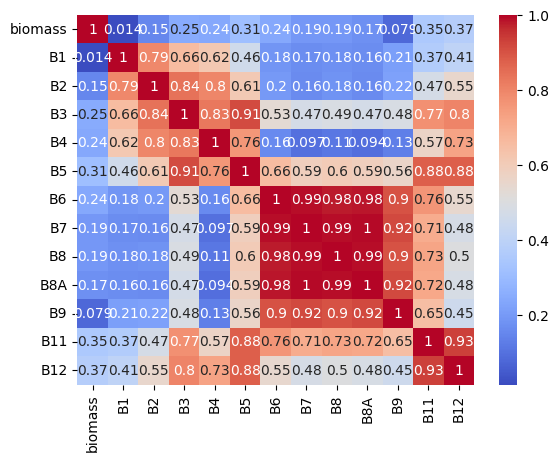

In [ ]:
# Correlation Coefficient: Measures the correlation between features and the target variable. Highly correlated features are considered more important.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(np.abs(corr_matrix), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Assume X and y are the feature matrix and target variable
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Get feature names
feature_names = X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X.shape[1])]

# Sort the feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Rearrange feature names and importances according to sorted index
sorted_importances = importances[sorted_idx]
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_feature_names, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:
# Chi-Square Test: Measures the dependence between features and the target variable (useful for categorical data).

from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)
X_reduced = selector.fit_transform(X, y)

ValueError: Unknown label type: (array([0.30434783, 0.08695652, 0.08695652, 0.04347826, 0.13043478,
       0.13043478, 0.17391304, 0.        , 0.04347826, 0.43478261,
       0.2173913 , 0.47826087, 0.47826087, 0.04347826, 0.        ,
       0.52173913, 0.56521739, 0.2173913 , 0.26086957, 0.13043478,
       0.60869565, 0.13043478, 0.        , 0.04347826, 0.        ,
       0.39130435, 0.2173913 , 0.        , 0.        , 0.13043478,
       0.08695652, 0.26086957, 0.13043478, 0.        , 0.        ,
       0.04347826, 0.04347826, 0.04347826, 0.        , 0.43478261,
       0.30434783, 0.17391304, 0.08695652, 0.        , 0.04347826,
       0.04347826, 0.73913043, 0.2173913 , 0.34782609, 0.04347826,
       1.        , 0.30434783, 0.08695652, 0.60869565, 0.13043478,
       0.30434783, 0.39130435, 0.52173913, 0.43478261, 0.60869565,
       0.08695652, 0.04347826, 0.        , 0.30434783, 0.13043478,
       0.26086957, 0.26086957, 0.        , 0.34782609, 0.65217391,
       0.04347826, 0.13043478, 0.2173913 , 0.17391304, 0.13043478,
       0.08695652, 0.04347826, 0.04347826, 0.34782609, 0.26086957,
       0.2173913 , 0.30434783, 0.47826087, 0.69565217, 0.26086957,
       0.52173913, 0.65217391, 0.39130435, 0.        , 0.91304348,
       0.7826087 , 0.13043478, 0.60869565, 0.39130435, 0.08695652,
       0.        , 0.        , 0.08695652, 0.39130435, 0.13043478,
       0.13043478, 0.08695652, 0.        , 0.04347826, 0.30434783,
       0.2173913 , 0.7826087 ]),)

In [ ]:
#Recursive Feature Elimination (RFE): This technique recursively removes the least important features, based on a model's performance.

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=5)  # Select the top 5 features
X_reduced = rfe.fit_transform(X, y)

pd.DataFrame(X_reduced).head()

0           1           2           3           4
0  1587.06250  4166.53125  5033.87500  3175.37500  2025.12500
1  1557.96875  3309.59375  4050.06250  3126.53125  2076.00000
2  1558.34375  4401.18750  5516.50000  3312.12500  2096.93750
3  1431.18750  3415.06250  4109.65625  2853.62500  1916.62500
4  1452.62500  4371.34375  5314.00000  3228.25000  2030.09375

In [ ]:
# Sequential Feature Selection: Adds or removes features sequentially based on model performance. It can be used for both forward and backward selection.
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
X_reduced = sfs.fit_transform(X, y)


In [ ]:
#Lasso (L1 Regularization): Lasso regression applies L1 regularization,
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
model.fit(X, y)
importance = np.abs(model.coef_)
selected_features = np.where(importance > 0)[0]  # Features with non-zero coefficients
selected_features

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.236e-02, tolerance: 5.676e-04
  model = cd_fast.enet_coordinate_descent(


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you've already removed duplicates and handled NaN values in X and y
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of regressors to try
regressors = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(n_neighbors=5)
}

# Store the results for comparison
results = []

# Train and evaluate each model
for name, model in regressors.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results.append({
        "Model": name,
        "Mean Squared Error": mse,
        "R-squared": r2
    })

# Convert the results to a DataFrame for easy comparison
results_df = pd.DataFrame(results)
print(results_df)


                           Model  Mean Squared Error  R-squared
0              Linear Regression            0.029017   0.245048
1        Random Forest Regressor            0.036088   0.061086
2    Gradient Boosting Regressor            0.043787  -0.139222
3       Support Vector Regressor            0.027618   0.281449
4  K-Nearest Neighbors Regressor            0.039785  -0.035099


1. **Summary of Findings**
*The predictive biomass model, trained using multispectral imagery from Sentinel-2 and biomass data from field plots, successfully provided biomass predictions across the reserve. The model performed well, with key spectral bands such as the near-infrared and red-edge bands proving crucial in predicting biomass values.

2. **Implications for Restoration Activities**
The biomass predictions can now be used to inform Rainforest Builder’s restoration activities. By identifying areas with lower biomass, efforts can be focused on regions that require immediate intervention. The model also helps in estimating carbon sequestration potential, aiding long-term conservation planning.

Challenges and Limitations
A few challenges were encountered during the project:

Data Limitations: The availability of biomass data was restricted to a single season, which may affect model generalization across other time periods.
Model Performance: Some bias was observed in predicting extreme biomass values, likely due to data imbalance.
Environmental Factors: Variability in tree species and terrain may introduce inaccuracies in biomass predictions.
Future Work
To enhance the model, future work could focus on:

Collecting biomass data across different seasons and forest types to improve model robustness.
Integrating advanced remote sensing techniques, such as LiDAR, to capture 3D forest structure and enhance prediction accuracy.
Experimenting with deep learning models for more complex pattern recognition and better predictive performance.
Scaling the model to cover other forest reserves and tropical forests globally.
Practical Implementation
The predictive model can be embedded into forest management systems to guide restoration efforts. By identifying areas with lower biomass, Rainforest Builder can prioritize interventions. The predictions can also be used to estimate carbon stocks and help with carbon credit calculations, further supporting conservation funding efforts.